In [1]:
import pandas as pd

# Load Data

In [7]:
df=pd.read_csv('Clusterin_csv1.csv')

In [8]:
df

,Test Case ID,Test Run Id,Failure Step count (since inception),Failed Steps,Exception Name,Application Under Test,Failed Step update date,Execution Time for test case,Predecessor TestCase ID,Successor TestCase ID
0,457.0,122.0,1.0,3.0,Fails to navigate step2,NaN,10-Jul-19,7/10/2019 17:16,0.0,405.0
1,405.0,122.0,1.0,3.0,"Verification Failed. Expected text: ""Manual Ha...",NaN,10-Jul-19,7/10/2019 18:11,457.0,371.0
2,371.0,122.0,1.0,8.0,"Verification Failed. Expected text: ""Step 6 of...",NaN,10-Jul-19,7/10/2019 19:54,405.0,370.0
3,370.0,122.0,1.0,2.0,"Verification Failed. Expected text: ""Step 6 of...",NaN,10-Jul-19,7/10/2019 19:58,371.0,369.0
4,369.0,122.0,1.0,9.0,"Verification Failed. Expected text: ""Step 6 of...",NaN,10-Jul-19,7/10/2019 20:02,370.0,431.0
...,...,...,...,...,...,...,...,...,...,...
131,350.0,122.0,1.0,5.0,Unable to find object with specified locator (...,NaN,11-Jul-19,7/11/2019 9:40,351.0,336.0
132,336.0,122.0,1.0,5.0,Unable to find object with specified locator (...,NaN,11-Jul-19,7/11/2019 10:21,350.0,0.0
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.drop(df.tail(3).index,inplace=True)

In [10]:
df.shape

(133, 10)

# Preprocessing

In [11]:
Update_date=[]
for date in df['Failed Step update date']:
    period = pd.Period(date, freq='D')
    Update_date.append(period.dayofyear)

df['Failed Step update date']=Update_date

In [15]:
df['Failed Step update date'].unique()

array([191, 192], dtype=int64)

In [33]:
import datetime as dt

In [31]:
#Converting the field type into Date and Time

df['Execution Time'] = pd.to_datetime(df['Execution Time for test case'])

In [39]:
df['Execution Time'].dt.hour.head()

0    17
1    18
2    19
3    19
4    20
Name: Execution Time, dtype: int64

In [40]:
df['exe_day'] = df['Execution Time'].dt.dayofyear

In [42]:
df['exe_month'] = df['Execution Time'].dt.month

In [44]:
df['exe_hour'] = df['Execution Time'].dt.hour

In [46]:
df['exe_min'] = df['Execution Time'].dt.minute

In [96]:
df1 = df.drop(['Application Under Test','Execution Time for test case', 'Execution Time'], axis=1, inplace = True)

KeyError: "['Application Under Test' 'Execution Time for test case' 'Execution Time'] not found in axis"

In [50]:
df.head()

,Test Case ID,Test Run Id,Failure Step count (since inception),Failed Steps,Exception Name,Failed Step update date,Predecessor TestCase ID,Successor TestCase ID,exe_day,exe_month,exe_hour,exe_min
0,457.0,122.0,1.0,3.0,Fails to navigate step2,191,0.0,405.0,191,7,17,16
1,405.0,122.0,1.0,3.0,"Verification Failed. Expected text: ""Manual Ha...",191,457.0,371.0,191,7,18,11
2,371.0,122.0,1.0,8.0,"Verification Failed. Expected text: ""Step 6 of...",191,405.0,370.0,191,7,19,54
3,370.0,122.0,1.0,2.0,"Verification Failed. Expected text: ""Step 6 of...",191,371.0,369.0,191,7,19,58
4,369.0,122.0,1.0,9.0,"Verification Failed. Expected text: ""Step 6 of...",191,370.0,431.0,191,7,20,2


# Text Wrangling and Normalization

In [51]:
from bs4 import BeautifulSoup
import re
import tqdm
import unicodedata

In [52]:
#function defined to remove html tags from data

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

In [53]:
#function defined to remove unicode data

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

In [54]:
# lower case and remove special characters\whitespaces

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    #doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    doc=re.sub('[0-9]', '', doc)
    norm_docs.append(doc)
  
  return norm_docs

In [55]:
#Data_Preprocessing

norm_exception = pre_process_corpus(df['Exception Name'])


100%|██████████| 133/133 [00:00<00:00, 3199.30it/s]


In [56]:
norm_exception

['fails to navigate step',
 'verification failed expected text manual handling not found in element',
 'verification failed expected text step  of  save and assign claim not found in element',
 'verification failed expected text step  of  save and assign claim not found in element',
 'verification failed expected text step  of  save and assign claim not found in element',
 'verification failed expected text straight payment not found in element',
 'verification failed expected text step  of  save and assign claim not found in element',
 'verification failed expected text step  of  save and assign claim not found in element',
 'verification failed expected text step  of  add costs information not found in element',
 'unable to find object with specified locator nametripgenericexpensepopupclaimgenetricexpencedetaildvclaimtripotherdetaildvcompanyname',
 'verification failed expected text step  of  save and assign claim not found in element',
 'verification failed expected text step  of  a

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

#stop_words = stop_words
cv = CountVectorizer(ngram_range=(1, 1), min_df=0.001, max_df=0.99)
cv_matrix1 = cv.fit_transform(norm_exception)
cv_matrix=cv_matrix1.toarray()

# Topic Modelling

In [98]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=7,random_state=42)
LDA.fit(cv_matrix1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=7, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [101]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['straight', 'payment', 'in', 'text', 'found', 'failed', 'expected', 'verification', 'not', 'element']


THE TOP 10 WORDS FOR TOPIC #1
['information', 'dteffectivedate', 'effective', 'date', 'driver', 'xp', 'info', 'chrome', 'true', 'false']


THE TOP 10 WORDS FOR TOPIC #2
['host', 'osversion', 'osname', 'osarch', 'ip', 'amd', 'session', 'usingxpath', 'valuedividfnolwizardfnolwizardfindpolicyscreenfnolwizardfindpolicypanelsetpolicyresultlvinsureddivdiv', 'info']


THE TOP 10 WORDS FOR TOPIC #3
['namefnolwizardfullwizardstepsetfnolwizardcreditcardtcoscreenotherinsurancecompanytcodvinsurancecompany', 'nametripaccommodationaddresspopupclaimpolicytripaccommodationdetaildvclaimtripaccommodationdetaildvdescription', 'idfnolwizardnext', 'find', 'specified', 'with', 'object', 'locator', 'to', 'unable']


THE TOP 10 WORDS FOR TOPIC #4
['find', 'specified', 'with', 'object', 'locator', 'nametripgenericexpensepopupclaimgenetricexpencedetaildvclaimtripotherdetaildvcom

In [58]:

# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
data2=pd.DataFrame(cv_matrix, columns=vocab)

In [79]:
data2

,acceptinsecurecerts,acceptsslcerts,add,amd,and,any,applicationcacheenabled,assign,bcccabbfafeabffdca,been,...,valuedividfnolwizardfnolwizardfindpolicyscreenfnolwizardfindpolicypanelsetpolicyresultlvinsureddivdiv,verification,version,visit,warning,webstorageenabled,wedwsvmtxadu,windows,with,xp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [59]:
data1=df.drop('Exception Name', axis=1)

In [60]:
data = pd.concat([data2,data1], axis=1)

In [80]:
data

,acceptinsecurecerts,acceptsslcerts,add,amd,and,any,applicationcacheenabled,assign,bcccabbfafeabffdca,been,...,Test Run Id,Failure Step count (since inception),Failed Steps,Failed Step update date,Predecessor TestCase ID,Successor TestCase ID,exe_day,exe_month,exe_hour,exe_min
0,0,0,0,0,0,0,0,0,0,0,...,122.0,1.0,3.0,191,0.0,405.0,191,7,17,16
1,0,0,0,0,0,0,0,0,0,0,...,122.0,1.0,3.0,191,457.0,371.0,191,7,18,11
2,0,0,0,0,1,0,0,1,0,0,...,122.0,1.0,8.0,191,405.0,370.0,191,7,19,54
3,0,0,0,0,1,0,0,1,0,0,...,122.0,1.0,2.0,191,371.0,369.0,191,7,19,58
4,0,0,0,0,1,0,0,1,0,0,...,122.0,1.0,9.0,191,370.0,431.0,191,7,20,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,0,0,0,0,0,0,0,0,0,...,122.0,1.0,10.0,192,320.0,348.0,192,7,9,21
129,0,0,0,0,0,0,0,0,0,0,...,122.0,1.0,2.0,192,341.0,351.0,192,7,9,32
130,0,0,0,0,0,0,0,0,0,0,...,122.0,1.0,9.0,192,348.0,350.0,192,7,9,34
131,0,0,0,0,0,0,0,0,0,0,...,122.0,1.0,5.0,192,351.0,336.0,192,7,9,40


In [72]:
data.dtypes

acceptinsecurecerts        int64
acceptsslcerts             int64
add                        int64
amd                        int64
and                        int64
                          ...   
Successor TestCase ID    float64
exe_day                    int64
exe_month                  int64
exe_hour                   int64
exe_min                    int64
Length: 145, dtype: object

In [85]:
#! pip install yellowbrick

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [87]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2DFF2FD48>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

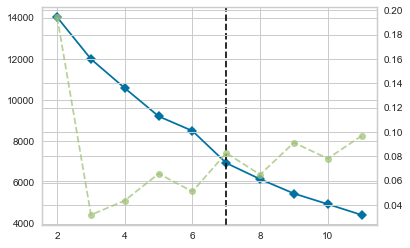

In [88]:
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(sc.fit_transform(data))
 

In [89]:
visualizer.elbow_value_

7

<Figure size 432x288 with 0 Axes>

In [90]:
from sklearn.cluster import KMeans
from sklearn import metrics

 

cluster_errors = []
cluster_sil_scores = []

 

cluster_range=range(2,10)

 

for Cluster in range(2,10):
    clusters = KMeans(Cluster)
    clusters.fit(sc.fit_transform(data))
    cluster_errors.append( clusters.inertia_ )

 

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,14023.627523
1,3,11956.736972
2,4,10650.773809
3,5,9104.408941
4,6,8456.830898
5,7,6944.874016
6,8,6216.127791
7,9,5608.968649


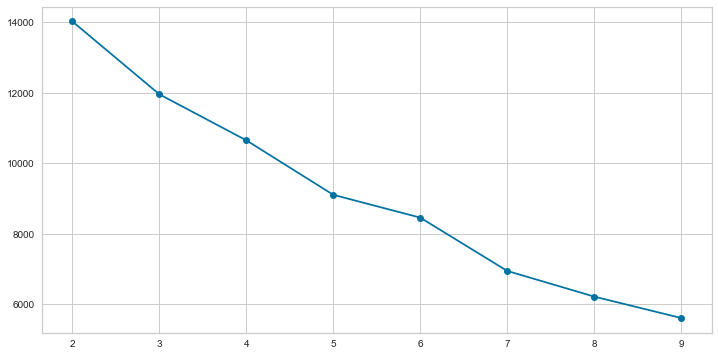

In [91]:
# Elbow plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


In [92]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = visualizer.elbow_value_
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=10000, n_init=100, random_state=42).fit(data)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=7, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [93]:
from collections import Counter

Counter(km.labels_)

Counter({5: 1, 4: 12, 0: 29, 2: 26, 1: 41, 6: 23, 3: 1})

In [94]:
df['kmeans_cluster'] = km.labels_

In [95]:
df

,Test Case ID,Test Run Id,Failure Step count (since inception),Failed Steps,Exception Name,Failed Step update date,Predecessor TestCase ID,Successor TestCase ID,exe_day,exe_month,exe_hour,exe_min,kmeans_cluster
0,457.0,122.0,1.0,3.0,Fails to navigate step2,191,0.0,405.0,191,7,17,16,5
1,405.0,122.0,1.0,3.0,"Verification Failed. Expected text: ""Manual Ha...",191,457.0,371.0,191,7,18,11,4
2,371.0,122.0,1.0,8.0,"Verification Failed. Expected text: ""Step 6 of...",191,405.0,370.0,191,7,19,54,4
3,370.0,122.0,1.0,2.0,"Verification Failed. Expected text: ""Step 6 of...",191,371.0,369.0,191,7,19,58,0
4,369.0,122.0,1.0,9.0,"Verification Failed. Expected text: ""Step 6 of...",191,370.0,431.0,191,7,20,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,341.0,122.0,1.0,10.0,Unable to find object with specified locator (...,192,320.0,348.0,192,7,9,21,0
129,348.0,122.0,1.0,2.0,Unable to find object with specified locator (...,192,341.0,351.0,192,7,9,32,0
130,351.0,122.0,1.0,9.0,Unable to find object with specified locator (...,192,348.0,350.0,192,7,9,34,0
131,350.0,122.0,1.0,5.0,Unable to find object with specified locator (...,192,351.0,336.0,192,7,9,40,0


In [75]:
cat_cluster = (df[['Test Case ID','Exception Name','kmeans_cluster']]
                  .sort_values(by=['kmeans_cluster'], 
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))


In [82]:
cat_cluster

,Test Case ID,Exception Name,kmeans_cluster
132,336.0,Unable to find object with specified locator (...,5
0,457.0,Fails to navigate step2,4
61,335.0,Fails to navigate step2,3
36,355.0,"Verification Failed. Expected text: ""Manual Ha...",3
42,379.0,"Verification Failed. Expected text: ""Straight ...",3
...,...,...,...
98,557.0,Insured Name: Bent Larsen has been created an...,0
14,502.0,"Verification Failed. Expected text: ""Step 6 of...",0
68,523.0,"Verification Failed. Expected text: ""Step 6 of...",0
65,536.0,"Verification Failed. Expected text: ""Step 6 of...",0


In [76]:
cat_cluster = cat_cluster.copy(deep=True)

In [78]:
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    #modules = cat_cluster[cat_cluster['kmeans_cluster'] == cluster_num]['Exception Name'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    #print('Exception Name', Exception Name)
    print('-'*80)

IndexError: list index out of range

In [68]:
feature_names = cv.get_feature_names()
topn_features = 10
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [73]:
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    #modules = cat_cluster[cat_cluster['kmeans_cluster'] == cluster_num]['Module'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    #print('Impacted Module', modules)
    print('-'*80)

IndexError: list index out of range

In [74]:
for cluster_num in range(NUM_CLUSTERS):
    key_features = [feature_names[index] 
                        for index in ordered_centroids[cluster_num, :topn_features]]
    #modules = cat_cluster[cat_cluster['kmeans_cluster'] == cluster_num]['Module'].values.tolist()
    print('CLUSTER #'+str(cluster_num+1))
    print('Key Features:', key_features)
    #print('Impacted Module', modules)
    print('-'*80)

IndexError: list index out of range